In [31]:
import time
import dask.bag as db
import matplotlib.pylab as plt
from functools import partial

In [ ]:
timings = {}
block = 10
for i in range (1, 10) :
    print("Block size = ",  block)
    start_time = time.perf_counter()
    b = db.read_text('transcript.txt', blocksize=block)
    wordcount = b.str.split().flatten().frequencies().topk(10, lambda x: x[1])
    output = wordcount.compute()
    end_time = time.perf_counter()
    block = block * 10
    timings[i] = end_time-start_time

#What do you notice about the output?
print(output)

Block size =  10
Block size =  100
Block size =  1000
Block size =  10000
Block size =  100000
Block size =  1000000
Block size =  10000000
Block size =  100000000
Block size =  1000000000
[('and', 1553), ('to', 1390), ('the', 1326), ('of', 974), ('a', 951), ('that', 905), ('you', 733), ('in', 664), ('I', 664), ('we', 487)]


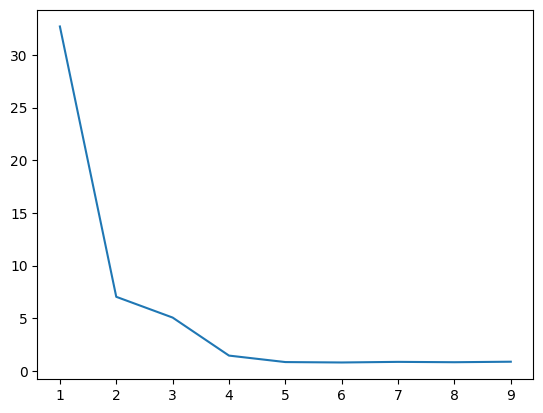

In [ ]:
lists = sorted(timings.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.show()

# When is Dask most efficient?

In [ ]:
#Challenge - Do better.
#1. Better time
#2. Better output

block = 10
TOP_20 = 20
stopword_set = []

def filter_stopword(word, stopwords) :
    return word not in stopwords

def filter_stopwords(words, stopwords) :
    return list(filter(partial(filter_stopword, stopwords=stopwords), words))

print("Block size = ",  block)
start_time = time.perf_counter()
b = db.read_text('transcript.txt', blocksize=block)

                          ### Added a step to filter stopwords.
wordcount = b.str.split().map(partial(filter_stopwords, stopwords=stopword_set)).flatten().frequencies().topk(TOP_20, lambda x: x[1])
output = wordcount.compute()
end_time = time.perf_counter()

print(output)
print("This run took ", end_time - start_time)